In [1]:
# --- Step 1: Set up and load the covariance matrix ---
## Building the covariance matrix
import emulator_3pt
import blackjax # https://blackjax-devs.github.io/blackjax/
from datetime import date
import jax.numpy as jnp
import jax
from jax.scipy.linalg import cho_solve, cho_factor
from jax import jit
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import gdown
rng_key = jax.random.key(int(date.today().strftime("%Y%m%d")))


In [2]:
# Download the covariance matrix and parameters
gdown.download(id='1H1H_tH43rOIeOUW6cY5cx8LjpscgaMeD',output='../outputs/covariance_matrix_T17.npy')

# Load the precomputed covariance matrix for the summary statistic
cov = np.load('../outputs/covariance_matrix_T17.npy')

# Dimensions
ns = 570 # Number realizations used to compute the covariance matrix
nd = 40 # dimensions of the summary statistic
ndim = 8 # number of parameters in the emulator

# Hartlap correction-inspired term
B = (ns - nd - 2) / ((ns - nd - 1) * (ns - nd - 4))
m = ndim + 2 + (ns - 1 + B * (nd - ndim)) / (1 + B * (nd - ndim))

# Inverse covariance (use Cholesky solve instead of explicit inverse)
inv_cov = cho_factor(cov)


Downloading...
From: https://drive.google.com/uc?id=1H1H_tH43rOIeOUW6cY5cx8LjpscgaMeD
To: /Users/pierreburger/GitHub/sampler_comparison/outputs/covariance_matrix_T17.npy
100%|██████████| 6.53k/6.53k [00:00<00:00, 15.8MB/s]


In [3]:
#Download the emulator
gdown.download(id='1EIwS-GgreuoNFBVOg9b94GhmoFekiLG1',output='../outputs/Map2_emu_converted.npz')
gdown.download(id='1sXXpqwTzz-JZh6VSmWaSGDmVQGLsNLc1',output='../outputs/Map3_emu_nell64_nphi512_converted.npz')

# --- Step 3: Restore pretrained emulator for the Map23 statistic ---
Map2_emu = emulator_3pt.cosmoemu_jax(filepath='../outputs/Map2_emu_converted.npz')
Map3_emu = emulator_3pt.cosmoemu_jax(filepath='../outputs/Map3_emu_nell64_nphi512_converted.npz')


priors_params = { 
                'M1_z0_cen': [9.000497821926116, 12.997892823056496], 
                'M_c': [10.009180624129629, 15.99716430647626], 
                'beta': [-0.9967784660541272, 0.6992383181501483], 
                'eta': [-0.6977833279473113, 0.1991947243758576], 
                'theta_inn': [-1.9998000600318366, -0.00020501523840121827],
                'Omega_m': [0.23008603805291986, 0.39969071100893877],
                'Omega_b': [0.04000982924130305, 0.059994733919925755],
                'sigma8': [0.7300666536240268, 0.8999825383034264],
            }

para_names_varying = priors_params.keys()

param_dict_emu_true = {name: jnp.asarray([priors_params[name][1]/2+priors_params[name][0]/2], dtype=jnp.float32) for name in para_names_varying}
print(param_dict_emu_true)

Map2_model = Map2_emu.ten_to_rescaled_predict(param_dict_emu_true)
Map3_model = Map3_emu.ten_to_rescaled_predict(param_dict_emu_true)
data = jnp.concatenate((Map2_model, Map3_model))
data


Downloading...
From: https://drive.google.com/uc?id=1EIwS-GgreuoNFBVOg9b94GhmoFekiLG1
To: /Users/pierreburger/GitHub/sampler_comparison/outputs/Map2_emu_converted.npz
100%|██████████| 19.5k/19.5k [00:00<00:00, 1.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sXXpqwTzz-JZh6VSmWaSGDmVQGLsNLc1
To: /Users/pierreburger/GitHub/sampler_comparison/outputs/Map3_emu_nell64_nphi512_converted.npz
100%|██████████| 24.4k/24.4k [00:00<00:00, 1.18MB/s]

../outputs/Map2_emu_converted.npz
KeysView(NpzFile '../outputs/Map2_emu_converted.npz' with keys: n_parameters, parameters, feature_dimensions, scaling_division, scaling_subtraction...)
../outputs/Map3_emu_nell64_nphi512_converted.npz
KeysView(NpzFile '../outputs/Map3_emu_nell64_nphi512_converted.npz' with keys: n_parameters, parameters, feature_dimensions, scaling_division, scaling_subtraction...)
{'M1_z0_cen': Array([10.999195], dtype=float32), 'M_c': Array([13.003173], dtype=float32), 'beta': Array([-0.14877008], dtype=float32), 'eta': Array([-0.2492943], dtype=float32), 'theta_inn': Array([-1.0000025], dtype=float32), 'Omega_m': Array([0.3148884], dtype=float32), 'Omega_b': Array([0.05000228], dtype=float32), 'sigma8': Array([0.8150246], dtype=float32)}


Array([1.0373104e-05, 6.9024700e-06, 4.0987356e-06, 2.4265528e-06,
       1.4889273e-06, 6.3597575e-08, 4.0477307e-08, 1.9791937e-08,
       8.7874321e-09, 3.8652641e-09, 2.6015130e-08, 1.1987660e-08,
       5.1634754e-09, 2.3082467e-09, 4.2711110e-09, 1.5020730e-09,
       6.2491534e-10, 3.7905229e-10, 1.2383462e-10, 2.7781343e-11,
       2.5694384e-08, 1.4967046e-08, 7.1493278e-09, 3.2396923e-09,
       8.6023864e-09, 3.7755035e-09, 1.6511909e-09, 1.2109629e-09,
       4.3223436e-10, 1.0605445e-10, 7.8317344e-09, 4.3985700e-09,
       2.1196558e-09, 2.3755067e-09, 1.0649880e-09, 3.3906128e-10,
       2.0960176e-09, 1.2129163e-09, 6.5972744e-10, 5.8111388e-10],      dtype=float32)

In [4]:
# --- Step 3: Define the log-prior function for the parameters ---
def cal_logprior(para_dict):
    violations = [
        (para_dict[name][0] < priors_params[name][0]) | (para_dict[name][0] > priors_params[name][1])
        for name in para_names_varying
    ]
    any_violation = jnp.any(jnp.array(violations))
    return jnp.where(any_violation, -jnp.inf, 0.0)
        

def calc_likelihood(Omega_m, Omega_b, sigma8, M1_z0_cen, M_c, beta, eta, theta_inn):
    
    param_dict_emu = {
        'Omega_m': jnp.asarray([Omega_m], dtype=jnp.float32),
        'Omega_b': jnp.asarray([Omega_b], dtype=jnp.float32),
        'sigma8': jnp.asarray([sigma8], dtype=jnp.float32),
        'M1_z0_cen': jnp.asarray([M1_z0_cen], dtype=jnp.float32),
        'M_c': jnp.asarray([M_c], dtype=jnp.float32),
        'beta': jnp.asarray([beta], dtype=jnp.float32),
        'eta': jnp.asarray([eta], dtype=jnp.float32),
        'theta_inn': jnp.asarray([theta_inn], dtype=jnp.float32)
    } 
    
    # Get model prediction

    Map2_model = Map2_emu.ten_to_rescaled_predict(param_dict_emu)
    Map3_model = Map3_emu.ten_to_rescaled_predict(param_dict_emu)
    model = jnp.concatenate((Map2_model, Map3_model))
    
    delta = model - data

    # Use Cholesky solve for chi2 computation
    chi2 = jnp.dot(delta, cho_solve(inv_cov, delta))
    likelihood = -0.5 * m * jnp.log1p(chi2 / (ns - 1))
    
    # likelihood = - jnp.log1p(10)
    
    logprior = cal_logprior(param_dict_emu)

    return likelihood + logprior


logdensity = lambda x: calc_likelihood(**x)

In [5]:
import os
use_mcmc_samples = True
filename = '../outputs/mcmc_samples_Map23_HMC.npy'
if os.path.exists(filename) and use_mcmc_samples:
    from numpy.linalg import inv
    mcmc_samples = np.load('../outputs/mcmc_samples_Map23_HMC.npy',allow_pickle=True).item()
    names = list(para_names_varying)
    samples_HMC = np.array([mcmc_samples[names[0]],mcmc_samples[names[1]],mcmc_samples[names[2]],mcmc_samples[names[3]],mcmc_samples[names[4]],mcmc_samples[names[5]],mcmc_samples[names[6]],mcmc_samples[names[7]]]).T[50_000:]
    inv_mass_matrix = np.diag(1.0 / np.var(samples_HMC, axis=0))
else:
    inv_mass_matrix = np.array([0.1]*8)# this can be optimised which would improve the performance of HMC

inv_mass_matrix

array([[1.0500247e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2116528e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 6.0039368e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0833063e+01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.4999714e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.5313369e+03, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.9696680e+04, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0

In [6]:
# --- Step 4: Define the inverse mass matrix for HMC (diagonal elements) ---
inv_mass_matrix = np.array([1]*8)# this can be optimised which would improve the performance of HMC
 
print('inv_mass_matrix', inv_mass_matrix)
   
num_integration_steps = 60
step_size = 1e-3

hmc = blackjax.hmc(logdensity, step_size, inv_mass_matrix, num_integration_steps)


initial_position = {name: jnp.asarray(priors_params[name][1]/2+priors_params[name][0]/2, dtype=jnp.float32) for name in para_names_varying}
print(initial_position)
initial_state = hmc.init(initial_position)


def inference_loop(rng_key, kernel, initial_state, num_samples):
    @jax.jit
    def one_step(state, rng_key):
        state, _ = kernel(rng_key, state)
        return state, state

    keys = jax.random.split(rng_key, num_samples)
    _, states = jax.lax.scan(one_step, initial_state, keys)

    return states

# --- Step 5: Run the MCMC sampling ---
nuts = blackjax.nuts(logdensity, step_size, inv_mass_matrix)
rng_key, sample_key = jax.random.split(rng_key)
states = inference_loop(sample_key, nuts.step, initial_state, 200_000)

mcmc_samples = states.position
mcmc_samples

np.save('../outputs/mcmc_samples_Map23_HMC', mcmc_samples)

inv_mass_matrix [1 1 1 1 1 1 1 1]
{'M1_z0_cen': Array(10.999195, dtype=float32), 'M_c': Array(13.003173, dtype=float32), 'beta': Array(-0.14877008, dtype=float32), 'eta': Array(-0.2492943, dtype=float32), 'theta_inn': Array(-1.0000025, dtype=float32), 'Omega_m': Array(0.3148884, dtype=float32), 'Omega_b': Array(0.05000228, dtype=float32), 'sigma8': Array(0.8150246, dtype=float32)}


In [7]:
# --- Step 4: Define the inverse mass matrix for HMC (diagonal elements) ---
initial_position = {name: jnp.asarray(priors_params[name][1]/2+priors_params[name][0]/2, dtype=jnp.float32) for name in para_names_varying}
print(initial_position)

def inference_loop(rng_key, kernel, initial_state, num_samples):
    @jax.jit
    def one_step(state, rng_key):
        state, _ = kernel(rng_key, state)
        return state, state

    keys = jax.random.split(rng_key, num_samples)
    _, states = jax.lax.scan(one_step, initial_state, keys)

    return states

# --- Step 5: Run the MCMC sampling ---

warmup = blackjax.window_adaptation(blackjax.nuts, logdensity)
rng_key, warmup_key, sample_key = jax.random.split(rng_key, 3)
(state, parameters), _ = warmup.run(warmup_key, initial_position, num_steps=10_000)

kernel = blackjax.nuts(logdensity, **parameters).step
states = inference_loop(sample_key, kernel, state, 200_000)

mcmc_samples = states.position
mcmc_samples

np.save('../outputs/mcmc_samples_Map23_HMC_warmup', mcmc_samples)

{'M1_z0_cen': Array(10.999195, dtype=float32), 'M_c': Array(13.003173, dtype=float32), 'beta': Array(-0.14877008, dtype=float32), 'eta': Array(-0.2492943, dtype=float32), 'theta_inn': Array(-1.0000025, dtype=float32), 'Omega_m': Array(0.3148884, dtype=float32), 'Omega_b': Array(0.05000228, dtype=float32), 'sigma8': Array(0.8150246, dtype=float32)}


Removed no burn in
Removed no burn in
Removed no burn in


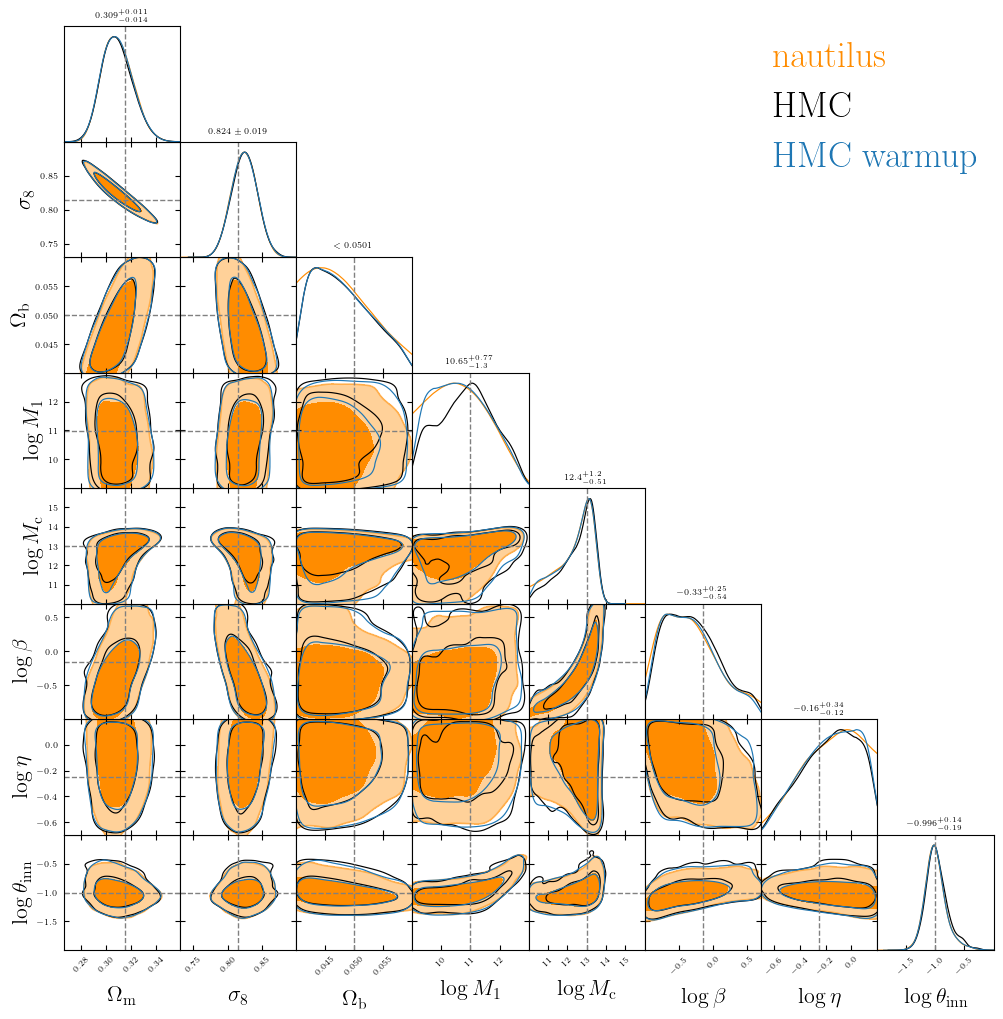

In [8]:
# --- Step 5: Import GetDist for plotting and post-processing MCMC results ---
from getdist import plots, MCSamples, parampriors
import getdist
import numpy as np

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 4)  # Adjust width & height
plt.rcParams["figure.dpi"] = 100  # Lower DPI for smaller display



para_names_latex = [r'$\Omega_\mathrm{m}$', r'$\sigma_8$', r'$\Omega_\mathrm{b}$', r'$\log M_1$', r'$\log M_\mathrm{c}$', r'$\log \beta$', r'$\log \eta$', r'$\log \theta_\mathrm{inn}$']


priors_params = { 
                'M1_z0_cen': [9.000497821926116, 12.997892823056496], 
                'M_c': [10.009180624129629, 15.99716430647626], 
                'beta': [-0.9967784660541272, 0.6992383181501483], 
                'eta': [-0.6977833279473113, 0.1991947243758576], 
                'theta_inn': [-1.9998000600318366, -0.00020501523840121827],
                'Omega_m': [0.23008603805291986, 0.39969071100893877],
                'Omega_b': [0.04000982924130305, 0.059994733919925755],
                'sigma8': [0.7300666536240268, 0.8999825383034264],
            }

para_names = list(priors_params.keys())




mcmc_samples = np.load('../outputs/mcmc_samples_Map23_HMC.npy',allow_pickle=True).item()
names = ['Omega_m', 'sigma8', 'Omega_b', 'M1_z0_cen', 'M_c', 'beta', 'eta', 'theta_inn']
samples_HMC = np.array([mcmc_samples[names[0]],mcmc_samples[names[1]],mcmc_samples[names[2]],mcmc_samples[names[3]],mcmc_samples[names[4]],mcmc_samples[names[5]],mcmc_samples[names[6]],mcmc_samples[names[7]]]).T[50_000:]
samples_HMC = MCSamples(samples=samples_HMC,names = names, settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3})

mcmc_samples = np.load('../outputs/mcmc_samples_Map23_HMC_warmup.npy',allow_pickle=True).item()
names = ['Omega_m', 'sigma8', 'Omega_b', 'M1_z0_cen', 'M_c', 'beta', 'eta', 'theta_inn']
samples_HMC_warmup = np.array([mcmc_samples[names[0]],mcmc_samples[names[1]],mcmc_samples[names[2]],mcmc_samples[names[3]],mcmc_samples[names[4]],mcmc_samples[names[5]],mcmc_samples[names[6]],mcmc_samples[names[7]]]).T[50_000:]
samples_HMC_warmup = MCSamples(samples=samples_HMC_warmup,names = names, settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3})

if(os.path.exists('../outputs/mcmc_samples_Map23_nautilus.npz')):
    samples_nautilus = np.load('../outputs/mcmc_samples_Map23_nautilus.npz')
    samples, names = samples_nautilus['points'], samples_nautilus['para_names_varying']
    samples_nautilus = MCSamples(samples=samples,weights= np.exp(samples_nautilus['log_w']),names = names, labels = para_names_latex, ranges = priors_params, settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3})


para_truth = {name: jnp.asarray(priors_params[name][1]/2+priors_params[name][0]/2, dtype=jnp.float32) for name in para_names_varying}


colors = ['black','C2','C0']
bright = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
retro = ['darkorange', 'blue', 'green','darkorange']

# retro = ['black','#e770a2','#4165c0','#5ac3be', '#696969', '#f79a1e', '#ba7dcd']


g = plots.get_subplot_plotter(width_inch=12)
g.settings.axis_marker_lw = 1.0
# g.settings.axis_marker_ls = '-' 
g.settings.title_limit_labels = False
g.settings.axis_marker_color = 'grey'
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth = 2.0
g.settings.linewidth_contour = 3.0
g.settings.legend_fontsize = 30
g.settings.axes_fontsize = 10
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = retro

priors = parampriors.ParamBounds()

contour_colors = ['darkorange', 'black', 'C0'] 

if(os.path.exists('../outputs/mcmc_samples_Map23_nautilus.npz')):
    g.triangle_plot(
        
        roots=[samples_nautilus, samples_HMC, samples_HMC_warmup],
        legend_labels = ['nautilus', 'HMC', 'HMC warmup'],
        filled=[True, False, False],
        contour_colors=contour_colors,
        legend_loc='upper right',
        
        title_limit=1,
        markers=para_truth,
    )
else:
    g.triangle_plot(
        
        roots=[samples_HMC, samples_HMC_warmup],
        legend_labels = ['HMC', 'HMC warmup'],
        filled=[False, False],
        contour_colors=contour_colors,
        legend_loc='upper right',
        
        title_limit=1,
        markers=para_truth,
    )

